In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('day10_credit_risk_boosting.csv')
df

,Age,Income,LoanAmount,CreditScore,PreviousDefaults,HighRisk
0,40.0,27600.0,15800.0,676.0,0,1
1,34.0,31600.0,7400.0,622.0,0,0
2,41.0,51200.0,16300.0,652.0,1,1
3,50.0,49200.0,18800.0,739.0,0,0
4,33.0,39700.0,14100.0,663.0,1,0
...,...,...,...,...,...,...
295,28.0,32300.0,15200.0,681.0,0,0
296,44.0,36000.0,11200.0,649.0,1,0
297,38.0,25300.0,12700.0,689.0,0,0
298,43.0,33300.0,18000.0,666.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               300 non-null    float64
 1   Income            300 non-null    float64
 2   LoanAmount        300 non-null    float64
 3   CreditScore       300 non-null    float64
 4   PreviousDefaults  300 non-null    int64  
 5   HighRisk          300 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 14.2 KB


In [4]:
df.describe()

,Age,Income,LoanAmount,CreditScore,PreviousDefaults,HighRisk
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,35.090000,39742.333333,12425.000000,656.883333,0.186667,0.240000
std,9.436741,14285.770965,4943.846045,70.704267,0.390295,0.427797
min,18.000000,10000.000000,1000.000000,447.000000,0.000000,0.000000
25%,28.000000,29425.000000,9100.000000,611.000000,0.000000,0.000000
50%,36.000000,39700.000000,12200.000000,662.000000,0.000000,0.000000
75%,41.000000,49225.000000,15600.000000,702.250000,0.000000,0.000000
max,65.000000,86200.000000,25200.000000,821.000000,1.000000,1.000000


In [5]:
df['HighRisk'].value_counts()

HighRisk
0    228
1     72
Name: count, dtype: int64

C:\Users\Lommy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


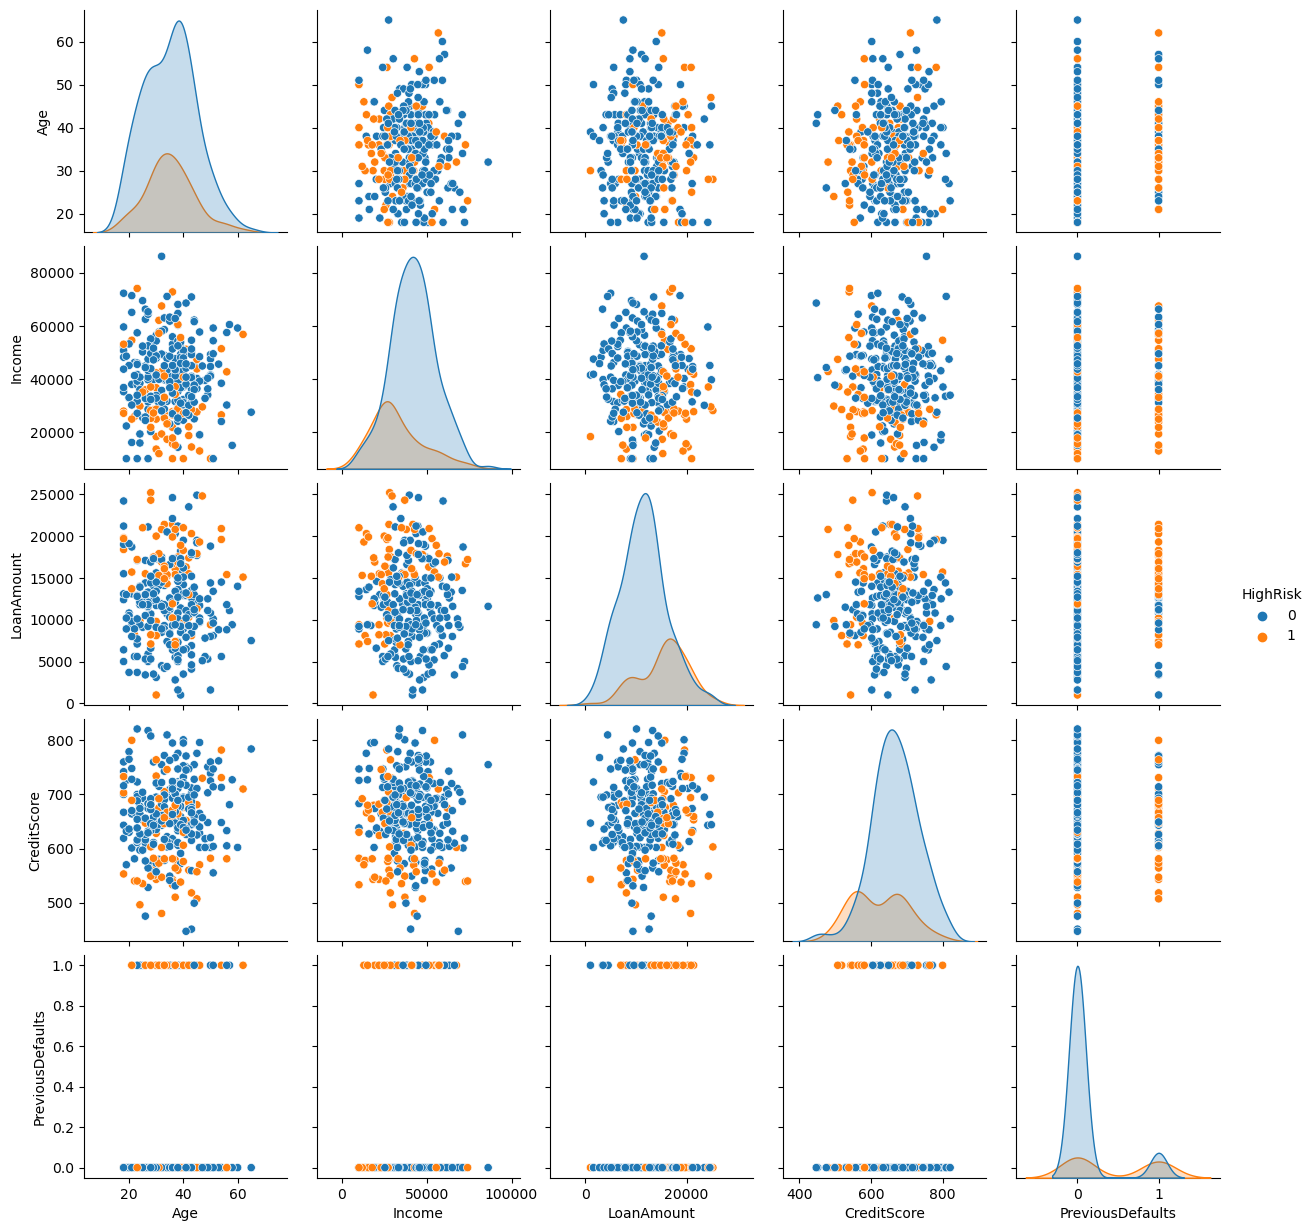

In [6]:
sns.pairplot(df, hue='HighRisk')
plt.show()

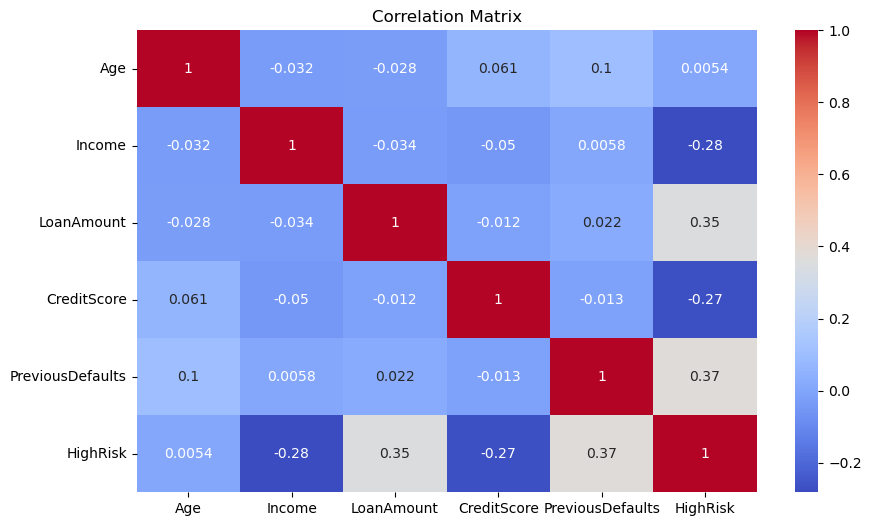

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Feature matrix and target
y = df['HighRisk']
X = df.drop(columns='HighRisk')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

In [12]:
print("\nAdaBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Results
Accuracy: 1.0
[[42  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [13]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

In [14]:
print("\nGradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results
Accuracy: 0.9666666666666667
[[42  0]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.89      0.94        18

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



In [15]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

C:\Users\Lommy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
print("\nXGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy: 0.95
[[42  0]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.83      0.91        18

    accuracy                           0.95        60
   macro avg       0.97      0.92      0.94        60
weighted avg       0.95      0.95      0.95        60



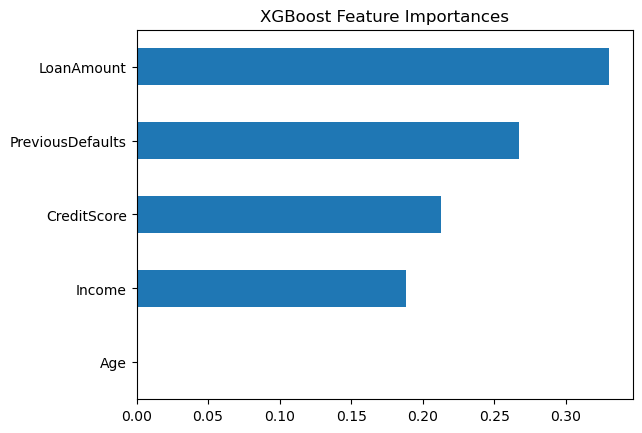

In [17]:
# Feature importance
pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title('XGBoost Feature Importances')
plt.show()